**Topic:** Factors affecting Lazada’s viewership on the TikTok social media platform

# **TABLE OF CONTENT**




>[TOPIC INTRODUCTION](#scrollTo=7BdxeNffcWAF)

>[DATASET CLARIFICATION](#scrollTo=yK2zbVGpfL0i)

>[SET UP](#scrollTo=hprfOOvSmZ-5)

>[DATA CLEANING](#scrollTo=KSmSCr4glVhz)

>>[Missing values](#scrollTo=1hNWGBjcxXQR)

>>[Duplicate values](#scrollTo=n6HVJJdwxk1s)

>>[Outliers](#scrollTo=3fMch15cA4iW)

>[DESCRIPTIVE ANALYSIS](#scrollTo=jPSelQ9MllCv)

>>[Describe the catergory features](#scrollTo=g8BnP5ot12oO)

>>[Distribution of Variables](#scrollTo=bzac-6Oj25vN)

>>[Measure of central tendency](#scrollTo=BXQEmH9l29xI)

>>[Other descriptive graphs](#scrollTo=YoKFEvXt2G4M)

>>[Overall Insights](#scrollTo=LnyIQwcFKOU8)

>[STATISTICAL CALCULATION](#scrollTo=cMB4mZCxlwDv)

>>[Variance and standard deviation](#scrollTo=jLiNzPSkwmw7)

>>[Correlation and covariance](#scrollTo=wQUv5FtWw6Fz)

>[LINEAR REGRESSION](#scrollTo=qCOwqInEbwCG)

>[RANDOM FOREST](#scrollTo=5bmLhfbvl1th)

>>[View Prediction](#scrollTo=cpmJEDonbk8G)

>>[Random Forest Result and Evaluation](#scrollTo=_jkwt4Whw2cT)

>>[Random Forest Algorithm Explanation](#scrollTo=yvhSnToLjxIF)

>[CONCLUSION AND RECOMMENDATIONS](#scrollTo=QU1Vd5AqjPgR)



# **TOPIC INTRODUCTION**

In today’s digital era, online marketing and e-commerce activities are becoming increasingly popular and widespread. Therefore, the more online promotional content reaches people, the more online promotional information that reaches individuals, the greater the effectiveness and productivity of brand marketing. As a result, I chose the topic “Factors affecting Lazada’s viewership on the TikTok social media platform” to analyze.

The purpose of the topic is to focus on applying data analysis and processing, and machine learning techniques to examine aspects that may impact viewing, allowing predictions about the views of Lazada videos on TikTok.



# **ABOUT DATASET**

The data used is collected from Lazada’s account on the TikTok platform using web scraping technique. The information is extracted from the website through the API using the TikTokApi library and Python tools. After obtaining the data, they are saved as a .csv file. Besides, the code includes the async and await functions which can only run in Python and are not able to run under Jupyter notebook. Therefore, our group attached the “**crawl_code.py**” file which we have used to scrap the data.

We referred to the code from the example file at this [link](https://github.com/davidteather/TikTok-Api/tree/main). I collected data from Lazada's videos on the TikTok platform in the period from its first video to November 11, 2023. Because the data was collected in a fixed time period rather than tracking real time, the data was copied and saved in CSV format for ease of data processing. I uploaded the CSV file to GitHub beside the analysis.

However, there is some datas that the docs do not provide instructions on how to get including duration, video height, video width, so I printed the video data in as_dict format to find data that can be exploited. In addition, I also split "Create_time" into the classification variables "Create_year", "Create_month", "Create_day", "Create_hour" to be able to analyze the insight of views by year, month, day and hour.

This code can be executed after install the library and playwright function using the following syntax in terminal:

"*pip install TikTokApi*

*python -m playwright install"*

Besides, to be able to crawl data on TikTok, you will need a msToken which can be obtained by following these steps:

- Log in to TikTok web
- Select the "Developer Tools" section
- In the "Application" tab, select "Cookies"
- There will be a msToken and you can copy it to paste into the line "ms_token" in our .py file

The dataset provides a variety of information on key factors of  different types of interactions on TikTok, such as the number of likes, comments, shares, and saves. It also includes the time the video was posted, the height and width of each video, all of which have an impact on the viewership.

Below is the dataset description:

* Create_time: The time the video is posted (year, month, day, time)
* Create_year: The year the video is posted (2020, 2021,2022,2023)
* Create_month: The month the video is posted (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
* Create_day: The day the video is posted (1, 2, 3,..., 31)
* Create_hour: The time the video is posted (1, 2, 3, …, 24)

* Likes: The number of likes of each video
* Comments: The number of comments of each video
* Saves: The number of saves of each video
* Shares: The number of shares of each video
* Duration (sec): The duration in second of each video
* Video Height: The height (size) of the each video frame
* Video Width: The width (size) of the each video frame
* Views: The views of each video

The dataset has 13 columns and 2056 rows. Of these, there are 6 numeric variables and 7 categorical variables.


# **SET UP**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
import matplotlib.cm as cm
import statistics
import math
from matplotlib.cm import plasma

In [2]:
class Dataloader():

    def __init__(self, csv_path):

        self.csv_path = csv_path
        self.data = pd.read_csv(self.csv_path)

        # Shuffle
        # frac: from 0 - 1.0 --> Fraction of data want to get
        self.data.sample(frac=1.0, replace=True, random_state=1)

    def getHeader(self):

        return list(self.data.columns.values)

    def getFullData(self):

        return self.data

In [3]:
dataloader = Dataloader('tiktok_lzd_data.csv')
data = dataloader.getFullData()

category_features = ['Create_year','Create_month','Create_day','Create_hour','Video Height', 'Video Width']
number_features = ['Likes', 'Comments', 'Saves', 'Shares','Duration(sec)']

features= category_features + number_features
target = ['Views']

In [4]:
data

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width
0,2023-11-11 15:04:17,2023,11,11,15,87,3,3,7674,3,14,960,544
1,2023-11-11 14:32:37,2023,11,11,14,271,14,6,20900,2,28,960,544
2,2023-11-11 11:44:26,2023,11,11,11,156,1,11,7885,0,20,1024,576
3,2023-11-11 10:18:15,2023,11,11,10,4349,43,17,299600,40,11,1024,576
4,2023-11-10 16:35:46,2023,11,10,16,8579,72,32,389800,113,121,1024,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2020-03-15 18:14:56,2020,3,15,18,85,1,0,4896,5,15,960,540
2052,2020-03-06 17:55:17,2020,3,6,17,91,1,1,4825,0,15,960,540
2053,2020-03-06 16:06:14,2020,3,6,16,90,2,3,5258,4,3,960,540
2054,2020-03-06 15:35:51,2020,3,6,15,100,2,1,6527,4,7,960,540


# **DATA CLEANING**

## **Missing values**

In [5]:
# Missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Create_time    2056 non-null   object
 1   Create_year    2056 non-null   int64 
 2   Create_month   2056 non-null   int64 
 3   Create_day     2056 non-null   int64 
 4   Create_hour    2056 non-null   int64 
 5   Likes          2056 non-null   int64 
 6   Comments       2056 non-null   int64 
 7   Saves          2056 non-null   int64 
 8   Views          2056 non-null   int64 
 9   Shares         2056 non-null   int64 
 10  Duration(sec)  2056 non-null   int64 
 11  Video Height   2056 non-null   int64 
 12  Video Width    2056 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 208.9+ KB


In [6]:
# Define null data
null_sum = data.isna().sum()
print("Number of null values in the dataset are:")
null_sum

Number of null values in the dataset are:


Create_time      0
Create_year      0
Create_month     0
Create_day       0
Create_hour      0
Likes            0
Comments         0
Saves            0
Views            0
Shares           0
Duration(sec)    0
Video Height     0
Video Width      0
dtype: int64

As we can see, the number of null values in the dataset are 0 in total in each attribute, so there is no missing value in this dataset.

Now, there are maybe some invalid value, such as duration(sec) of the video should be > 0, so check if videos with duration(sec) = 0 exist and remove because they are not included in our research.

In [7]:
# Check videos with duration(sec)=0
data[data['Duration(sec)'] == 0]

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width
25,2023-08-26 13:30:55,2023,8,26,13,495,7,23,23000,4,0,0,0
30,2023-06-30 16:10:50,2023,6,30,16,91,2,12,8619,2,0,0,0


After dropping, there are 2054 videos with Duration(sec)>0 as illustrated in the table below

In [8]:
removed_invalid_data = data[data['Duration(sec)'] > 0]
len(removed_invalid_data)

2054

In [9]:
removed_invalid_data

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width
0,2023-11-11 15:04:17,2023,11,11,15,87,3,3,7674,3,14,960,544
1,2023-11-11 14:32:37,2023,11,11,14,271,14,6,20900,2,28,960,544
2,2023-11-11 11:44:26,2023,11,11,11,156,1,11,7885,0,20,1024,576
3,2023-11-11 10:18:15,2023,11,11,10,4349,43,17,299600,40,11,1024,576
4,2023-11-10 16:35:46,2023,11,10,16,8579,72,32,389800,113,121,1024,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2020-03-15 18:14:56,2020,3,15,18,85,1,0,4896,5,15,960,540
2052,2020-03-06 17:55:17,2020,3,6,17,91,1,1,4825,0,15,960,540
2053,2020-03-06 16:06:14,2020,3,6,16,90,2,3,5258,4,3,960,540
2054,2020-03-06 15:35:51,2020,3,6,15,100,2,1,6527,4,7,960,540


## **Duplicate values**

No duplicate values because of empty dataframe

In [10]:
# Check duplicate values
removed_invalid_data[removed_invalid_data.duplicated()]

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width


## **Outliers**

Use box plot to define the distribution of data, check if there are any outliers (Views attribute).

Text(0.5, 1.0, 'Boxplot for Views')

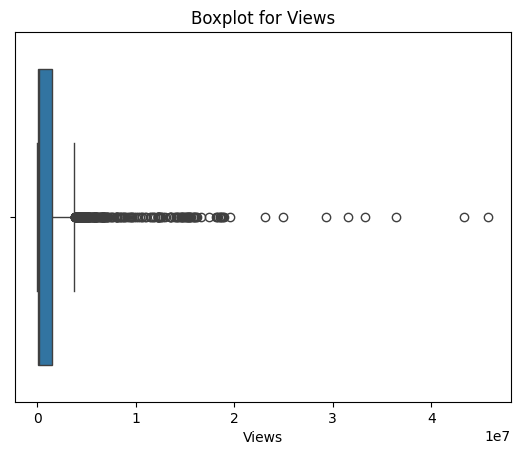

In [11]:
sns.boxplot(x=removed_invalid_data['Views'])
plt.title('Boxplot for Views')

The plot indicates the presence of many outliers in this dataset. To address this, the Interquartile Range (IQR) method is implemented to identify and remove those outliers.

In [12]:
# Outliers
# Quantile 0.25 (1/4)
q1 = removed_invalid_data['Views'].quantile(0.25)
# Quantile 0.75 (3/4)
q3 = removed_invalid_data['Views'].quantile(0.75)
# Interquartile
iqr = q3 - q1

# Filter outliers
finaldata = removed_invalid_data[(removed_invalid_data['Views'] >= (q1 - 1.5 * iqr)) & (removed_invalid_data['Views'] <= (q3 + 1.5 * iqr))]

In [13]:
finaldata

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width
0,2023-11-11 15:04:17,2023,11,11,15,87,3,3,7674,3,14,960,544
1,2023-11-11 14:32:37,2023,11,11,14,271,14,6,20900,2,28,960,544
2,2023-11-11 11:44:26,2023,11,11,11,156,1,11,7885,0,20,1024,576
3,2023-11-11 10:18:15,2023,11,11,10,4349,43,17,299600,40,11,1024,576
4,2023-11-10 16:35:46,2023,11,10,16,8579,72,32,389800,113,121,1024,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2020-03-15 18:14:56,2020,3,15,18,85,1,0,4896,5,15,960,540
2052,2020-03-06 17:55:17,2020,3,6,17,91,1,1,4825,0,15,960,540
2053,2020-03-06 16:06:14,2020,3,6,16,90,2,3,5258,4,3,960,540
2054,2020-03-06 15:35:51,2020,3,6,15,100,2,1,6527,4,7,960,540


In [14]:
print("Dataset with outliers: {}".format(len(removed_invalid_data)))
print("Dataset without outliers: {}".format(len(finaldata)))

Dataset with outliers: 2054
Dataset without outliers: 1809


# **DESCRIPTIVE ANALYSIS**

## **Describe the catergory features**

In [15]:
# Describe the catergory_features
for col in category_features:
    finaldata[col] = finaldata[col].astype('category')
finaldata[category_features].describe()

,Create_year,Create_month,Create_day,Create_hour,Video Height,Video Width
count,1809,1809,1809,1809,1809,1809
unique,4,12,31,20,64,29
top,2022,6,10,17,1024,576
freq,583,231,112,174,876,932


A dataset of 1809 videos was analyzed to determine their creation dates and video dimensions.
* The videos were created across four different years, with the majority (583) being created in 2022.
* They were also created across 12 different months, with the most (231) being created in June.
* Additionally, the videos were created across 31 different days, with the most (112) being created on the 10th of the month.
* Furthermore, the videos were created across 20 different hours, with the most (174) being created at 5pm (17:00).
* In terms of video dimensions, the videos have a height ranging from 32 to 1024 pixels, with the most (876) having a height of 1024 pixels. Similarly, the videos have a width ranging from 176 to 576 pixels, with the most (932) having a width of 576 pixels.

## **Distribution of Variables**

Text(-3.6805555555555554, 0.5, 'Number of videos')

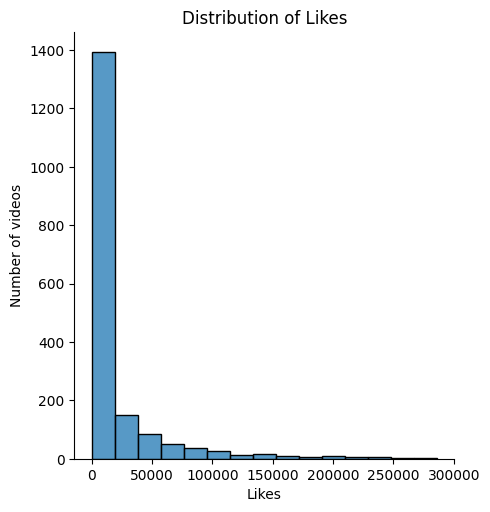

In [16]:
# Distribution of Likes
sns.displot(finaldata['Likes'],ec='black',bins=15)
plt.title('Distribution of Likes')
plt.ylabel("Number of videos")

* The majority of likes lies between 0 and 30000.
* The highest range of likes is from 0 to 10000 with over 1200 videos counted.
* For videos with likes ranging from 30000 to under 100000, there are less than 100 videos in each range.
* There are rarely few videos with more than 150000 likes.

Text(-3.6805555555555554, 0.5, 'Number of videos')

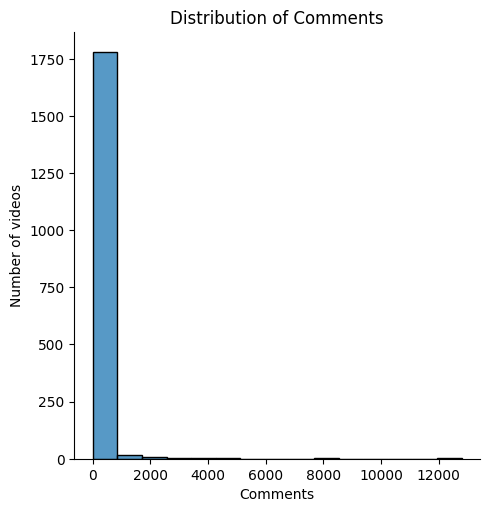

In [17]:
# Distribution of Comments
sns.displot(finaldata['Comments'],ec='black',bins=15)
plt.title('Distribution of Comments')
plt.ylabel("Number of videos")

* The majority of comments lies between 0 and 400 with nearly 1750 videos counted.
* For videos with comments ranging from 400 to 2000, there are  less than 25 videos in each range.
* There are only a few or nearly no videos with more than 2000 comments.

Text(-3.8055555555555554, 0.5, 'Number of videos')

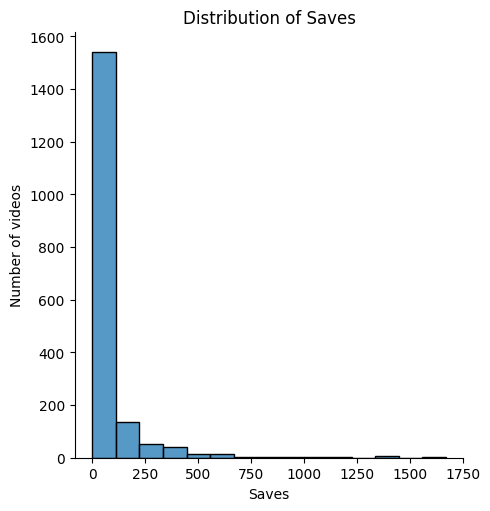

In [18]:
# Distribution of Saves
sns.displot(finaldata['Saves'],ec='black',bins=15)
plt.title('Distribution of Saves')
plt.ylabel("Number of videos")

* The majority of saves lies between 0 and 150.
* The highest range of saves is from 0 to 50 with nearly 1350 videos counted.
* For videos with saves ranging from 150 to 500, there are less than 50 videos in each range.
* There are rarely few videos with more than 750 saves.

Text(-3.6805555555555554, 0.5, 'Number of videos')

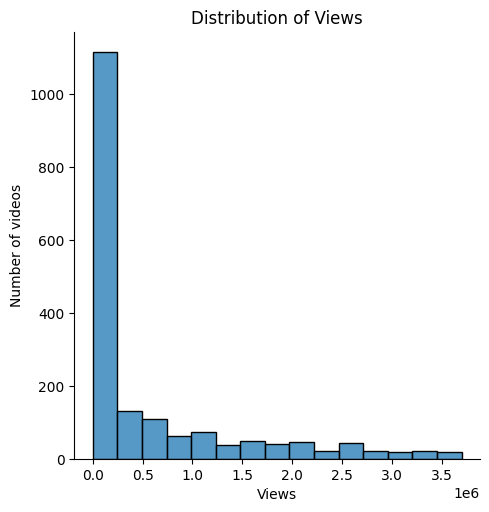

In [19]:
# Distribution of Views
sns.displot(finaldata['Views'],ec='black',bins=15)
plt.title('Distribution of Views')
plt.ylabel("Number of videos")

* The majority of views lies between 0 and 100000 with more than 1000 videos counted.
* For videos with views ranging from 100000 to 300000, there are more than 50 videos in each range.
* For videos with views ranging from 100000 to 350000, there are less than 50 videos in each range.
* There are rarely few videos with more than 350000 views.

Text(-3.8055555555555554, 0.5, 'Number of videos')

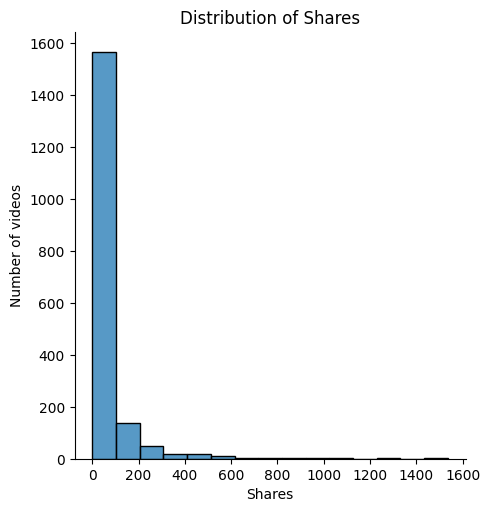

In [20]:
# Distribution of Shares
sns.displot(finaldata['Shares'],ec='black',bins=15)
plt.title('Distribution of Shares')
plt.ylabel("Number of videos")

* The majority of shares lies between 0 and 150.
* The highest range of shares is from 0 to 50 with nearly 1400 videos counted.
* For videos with shares ranging from 150 to 400, there are less than 50 videos in each range.
* There are rarely few videos with more than 600 shares.


Text(5.069444444444445, 0.5, 'Number of videos')

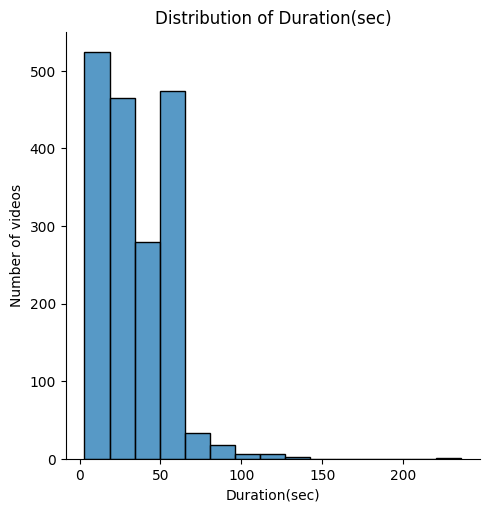

In [21]:
# Distribution of Duration(sec)
sns.displot(finaldata['Duration(sec)'],ec='black',bins=15)
plt.title('Distribution of Duration(sec)')
plt.ylabel("Number of videos")

* The majority of duration lies between 10 and 70 seconds.
* The highest range of duration is from 10 to 20 seconds with more than 400 videos counted.
* For videos with duration ranging from 70 to 150 seconds, there are more less than 25 videos in each range.
* There are rarely few or no videos with more than 150 seconds.

## **Measure of central tendency**

In [22]:
data = np.array(finaldata)
Likes = data[:, 5]
Comments = data[:, 6]
Saves = data[:, 7]
Views = data[:, 8]
Shares = data[:, 9]
Duration = data[:, 10]

In [23]:
# Mean of Likes
meanLikes = statistics.mean(Likes)
print("Median of Likes:",meanLikes)

# Mean of Comments
meanComments = statistics.mean(Comments)
print("Median of Comments:",meanComments)

# Mean of Saves
meanSaves = statistics.mean(Saves)
print("Median of Saves:",meanSaves)

# Mean of Views
meanViews = statistics.mean(Views)
print("Median of Views:",meanViews)

# Mean of Shares
meanShares = statistics.mean(Shares)
print("Median of Shares:",meanShares)

# Mean of Duration
meanDuration = statistics.mean(Duration)
print("Median of Duration:",meanDuration)

Median of Likes: 18393.644002211167
Median of Comments: 90.70315091210614
Median of Saves: 63.292426755113325
Median of Views: 556314.2111663902
Median of Shares: 49.11829740187949
Median of Duration: 35.074074074074076


* The average number of Likes received by a particular entity or dataset is 18393.644. This value suggests a high level of engagement, with each item receiving an average of over 18,000 likes. This implies that the content is generally well-received and resonates with the audience.
* The average number of Comments generated per content item is 90.7032. This suggests a moderate level of discussion and interaction prompted by the content. This indicates that the content is not only liked but also sparks conversation and engagement among viewers.
* The average number of Saves for all videos is 63.2924. The figure suggests that the content is considered valuable and worth keeping for future reference or enjoyment. Users are actively bookmarking or saving the content for future access.
* The average number of Views is 556,314.2112. This number indicates a very high level of viewership, suggesting that the content has a large audience and is widely seen.
* The average number of Shares is 49.1183, which suggests a moderate level of sharing. This indicates that the content is considered shareable to some extent but not necessarily virally shared.
* The average number of Duration is 35.0741. This metric represents the average duration of the content items, possibly in seconds. This value suggests that the content is relatively short, with an average length of around 35 seconds. This could make the content more consumable and appealing to viewers with shorter attention spans.

In [24]:
# Mode of Likes
modeLikes = statistics.mode(Likes)
print("Mode of Likes:",modeLikes)

# Mode of Comments
modeComments = statistics.mode(Comments)
print("Mode of Comments:",modeComments)

# Mode of Saves
modeSaves = statistics.mode(Saves)
print("Mode of Saves:",modeSaves)

# Mode of Views
modeViews = statistics.mode(Views)
print("Mode of Views:",modeViews)

# Mode of Shares
modeShares = statistics.mode(Shares)
print("Mode of Shares:",modeShares)

# Mode of Duration
modeDuration = statistics.mode(Duration)
print("Mode of Duration:",modeDuration)

Mode of Likes: 65
Mode of Comments: 0
Mode of Saves: 1
Mode of Views: 1100000
Mode of Shares: 1
Mode of Duration: 15


* Mode of Likes is 65 indicates that the most frequent number of likes for a video is 65.
* Mode of Comments is 0 suggests that the most common number of comments for a video is 0, implying that there are a significant number of videos with no comments.
* Mode of Saves is 1 implies that the most frequent number of saves for a video is 1, suggesting that many videos are saved only by a few users.
* Mode of Views is 1100000 indicates that the most common number of views for a video is 1100000, suggesting that there are a few exceptionally popular videos with a very high number of views.
* Mode of Shares is 1 implies that the most frequent number of shares for a video is 1, suggesting that many videos are shared only by a few users.
* Mode of Duration is 15 indicates that the most common duration for a video is 15 seconds, further reinforcing the trend of short-form videos within the collection.

In [25]:
# Median of Likes
medianLikes = statistics.median(Likes)
print("Median of Likes:",medianLikes)

# Median of Comments
medianComments = statistics.median(Comments)
print("Median of Comments:",medianComments)

# Median of Saves
medianSaves = statistics.median(Saves)
print("Median of Saves:",medianSaves)

# Median of Views
medianViews = statistics.median(Views)
print("Median of Views:",medianViews)

# Median of Shares
medianShares = statistics.median(Shares)
print("Median of Shares:",medianShares)

# Median of Duration
medianDuration = statistics.median(Duration)
print("Median of Duration:",medianDuration)

Median of Likes: 1384
Median of Comments: 6
Median of Saves: 12
Median of Views: 51900
Median of Shares: 9
Median of Duration: 30


* The median number of Likes is 1384 means that half of the videos have 1384 or more likes, while the other half has 1384 or fewer likes. This suggests that the overall popularity of the videos is moderate, with a significant number of videos receiving a high number of likes.
* The median number of Comments is 6 means that half of the videos have 6 or more comments, while the other half has 6 or fewer comments. This suggests that the overall level of engagement with the videos is relatively low, with most videos receiving only a small number of comments.
* The median number of Saves is 12 means that half of the videos have 12 or more saves, while the other half has 12 or fewer saves. This suggests that the overall popularity of the videos is relatively good, with a significant number of videos being saved by users. This indicates that the videos are considered to be valuable and worth keeping for future reference or enjoyment.
* The median number of Views is 51900 means that half of the videos have 51900 or more views, while the other half has 51900 or fewer views. This suggests that the overall viewership of the videos is relatively high, with a significant number of videos receiving a substantial number of views. This indicates that the videos are considered to be engaging and worth watching by users.
* The median number of Shares is 9 means that half of the videos have 9 or more shares, while the other half has 9 or fewer shares. This suggests that the overall level of sharing for the videos is relatively low, with most videos being shared by only a small number of users. This indicates that the videos are not widely disseminated or considered particularly shareable.
* The median number of Duration is 30 means that half of the videos have a duration of 30 seconds or more, while the other half has a duration of 30 seconds or less. This suggests that the overall duration of the videos is relatively short, with a significant number of videos being under a minute long. This indicates that the videos are likely to be consumable in a short amount of time, which may be appealing to viewers who have limited attention spans or prefer quick and concise content.

## **Other descriptive graphs**

In [26]:
# Define the total number of videos in each year
def videos_created_by_year(year_data):
    year_counts = {}

    for row in year_data:
        year = row
        if year not in year_counts:
            year_counts[year] = 0
        year_counts[year] += 1

    return year_counts
number_of_videos_created_by_year = videos_created_by_year(finaldata["Create_year"])
number_of_videos_created_by_year

{2023: 152, 2022: 583, 2021: 508, 2020: 566}

In [27]:
# Transform the dict_keys into list of strings
years = number_of_videos_created_by_year.keys()
videos = number_of_videos_created_by_year.values()
list_of_string_years = list(str(year) for year in years)
list_of_string_years

['2023', '2022', '2021', '2020']

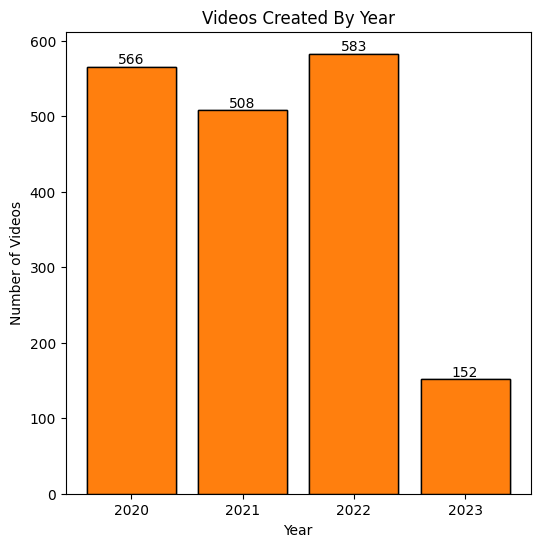

In [28]:
# Plot a bar chart
plt.figure(figsize=(6, 6))
plt.bar(years, videos, edgecolor='black', tick_label=list_of_string_years)

for bar_object, count in zip(plt.bar(years, videos, edgecolor='black', tick_label=list_of_string_years), videos):
    plt.text(bar_object.get_x() + bar_object.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.title('Videos Created By Year')

plt.show()

**Interpretation**

The number of videos created in 2020 was 566. This number dropped to 508 in 2021 and further increased to 583 in 2022. Although the data for 2023 is still incomplete as it was only collected up to November 11, 2023. Despite nearly half of the year having passed, the number of videos created in 2023 has not yet reached half of the number created in previous years. As a result, it can be predicted that the number of videos created experienced a significant drop this year.

In [29]:
# Define the number of videos in each month
def videos_created_by_month(month_data):
    month_counts = {}

    for row in month_data:
        month = row
        if month not in month_counts:
            month_counts[month] = 0
        month_counts[month] += 1

    return month_counts
number_of_videos_created_by_month = videos_created_by_month(finaldata["Create_month"])
number_of_videos_created_by_month

{11: 175,
 10: 153,
 9: 218,
 8: 141,
 7: 132,
 6: 231,
 5: 105,
 4: 97,
 3: 219,
 2: 65,
 1: 115,
 12: 158}

In [30]:
# Transform the dict_keys into list of strings
months = number_of_videos_created_by_month.keys()
videos = number_of_videos_created_by_month.values()
list_of_string_months = list(str(month) for month in months)
list_of_string_months

['11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '12']

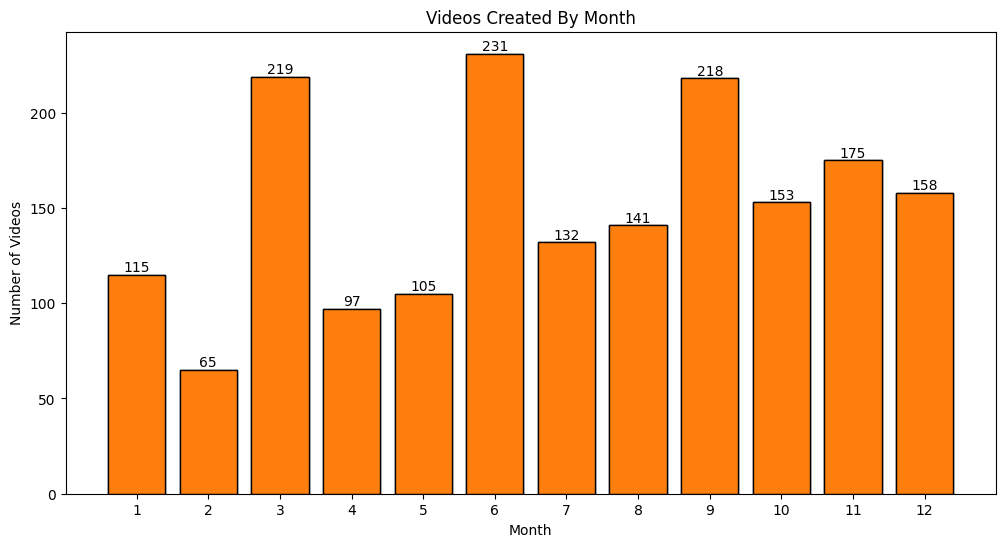

In [31]:
# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(months, videos, edgecolor='black', tick_label=list_of_string_months)

for bar_object, count in zip(plt.bar(months, videos, edgecolor='black', tick_label=list_of_string_months), videos):
    plt.text(bar_object.get_x() + bar_object.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.title('Videos Created By Month')

plt.show()

**Interpretation**

The highest number of videos (231) was created in June, while the lowest number (65) was created in February. Video creation generally increased from January to December, except for a significant drop in February. September (218 videos) and March (219 videos) had the second and third highest numbers of videos created, respectively.

With more videos being made in the latter half of the year, it could be due to the increase in special occasions during this period. However, there is also some variation within each month, suggesting that other factors may also play a role in video creation.

In [32]:
# Define the number of videos in each day
def videos_created_by_day(day_data):
    day_counts = {}

    for row in day_data:
        day = row
        if day not in day_counts:
            day_counts[day] = 0
        day_counts[day] += 1

    return day_counts
number_of_videos_created_by_day = videos_created_by_day(finaldata["Create_day"])

In [33]:
# # Transform the dict_keys into list of strings
days = number_of_videos_created_by_day.keys()
videos = number_of_videos_created_by_day.values()
list_of_string_days = list(str(day) for day in days)
list_of_string_days

['11',
 '10',
 '9',
 '8',
 '6',
 '31',
 '29',
 '27',
 '25',
 '14',
 '7',
 '30',
 '4',
 '20',
 '5',
 '21',
 '2',
 '23',
 '19',
 '17',
 '15',
 '28',
 '26',
 '1',
 '13',
 '3',
 '24',
 '22',
 '12',
 '18',
 '16']

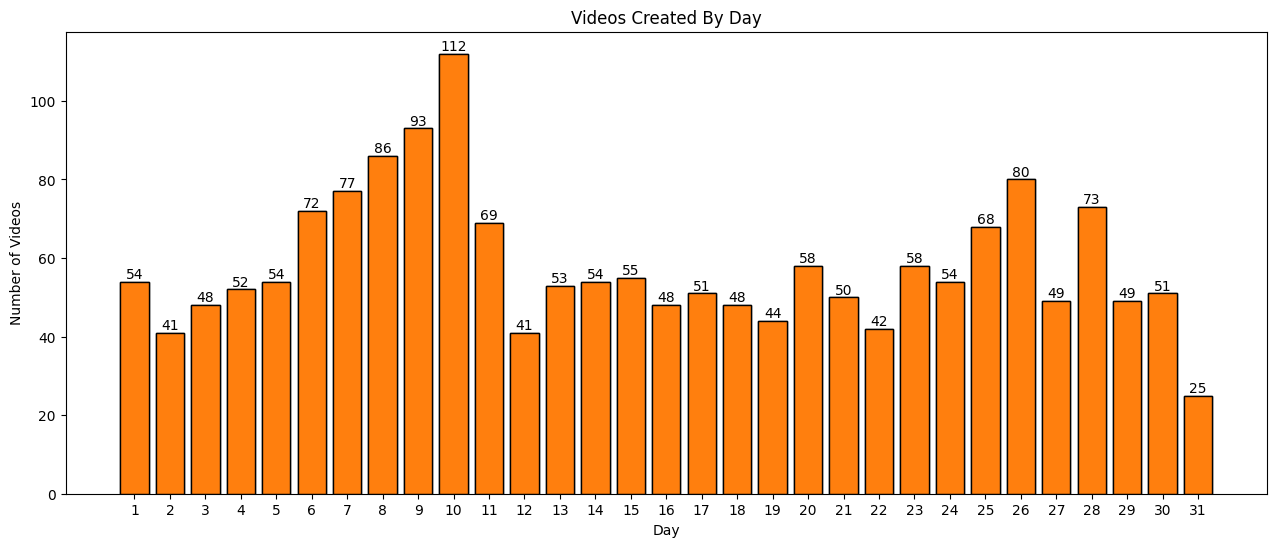

In [34]:
# Plot a bar chart
plt.figure(figsize=(15.5, 6))
plt.bar(days, videos, edgecolor='black', tick_label=list_of_string_days)

for bar_object, count in zip(plt.bar(days, videos, edgecolor='black', tick_label=list_of_string_days), videos):
    plt.text(bar_object.get_x() + bar_object.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.xlabel('Day')
plt.ylabel('Number of Videos')
plt.title('Videos Created By Day')

plt.show()

**Interpretation**

The usual range for daily video production is between 40 and 70 videos. However, there was a noticeable upward trend in video creation from day 6 to day 10, culminating in a peak of 112 videos created on day 10. This surge could be linked to Lazada's special flash sales events that took place during these days.

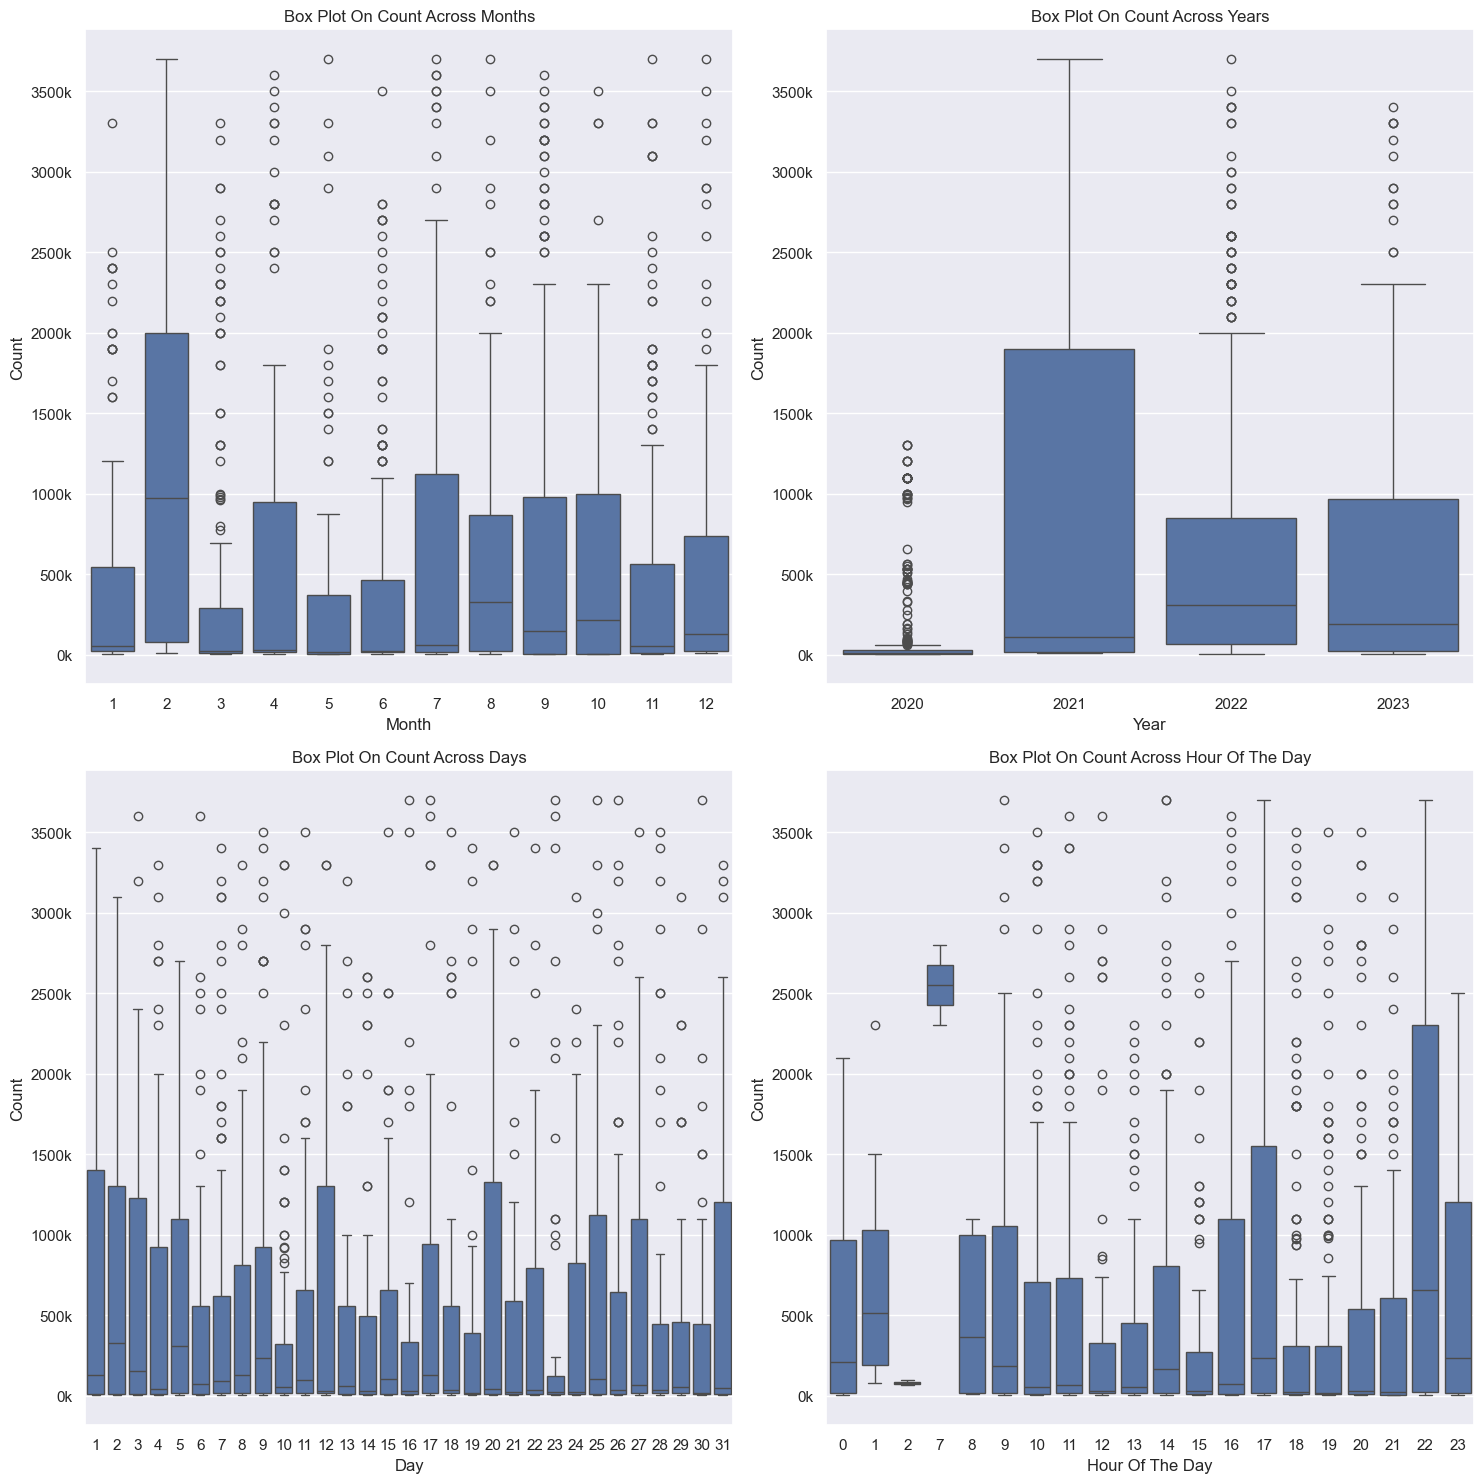

In [35]:
# Create the formatter function
def thousands_formatter(value, pos):
    return f"{value / 1000:.0f}k"

sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)

# sns.boxplot(finaldata,y="Views",orient="v",ax=axes[0][0])
sns.boxplot(finaldata,y="Views",x="Create_month",orient="v",ax=axes[0][0])
sns.boxplot(finaldata,y="Views",x="Create_year",orient="v",ax=axes[0][1])
sns.boxplot(finaldata,y="Views",x="Create_day",orient="v",ax=axes[1][0])
sns.boxplot(finaldata,y="Views",x="Create_hour",orient="v",ax=axes[1][1])

# Set the y-axis formatter
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][0].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[0][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Years")
axes[1][0].set(xlabel='Day', ylabel='Count',title="Box Plot On Count Across Days")
axes[1][1].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")

plt.tight_layout()
plt.show()

**Interpretation**

- **Month Box Plot:** An analysis of the monthly viewership distribution reveals that February exhibits a statistically significant spike in views compared to other months. This observation is further supported by the contrasting low viewership observed in March.

- **Year Box Plot:** A comparison of annual viewership trends indicates that Lazada's videos achieved peak viewership in 2021, while 2020 experienced a notable low in viewership.

- **Day Box Plot**:An examination of daily viewership patterns suggests that viewership for TikTok videos tends to concentrate on the first day of the month and on specific days throughout the month, such as the 12th, 20th, and 31st.

- **Hour Box Plot:** An investigation of hourly viewership patterns demonstrates that the 10:00 PM time slot consistently attracts the highest viewership for Lazada's videos.

**Top videos based on view**

In [36]:
top_100_views = finaldata.sort_values(by='Views',ascending=False).head(100)
top_100_views.head(20)

,Create_time,Create_year,Create_month,Create_day,Create_hour,Likes,Comments,Saves,Views,Shares,Duration(sec),Video Height,Video Width
838,2021-12-23 14:04:33,2021,12,23,14,147300,903,414,3700000,262,36,1024,576
886,2021-11-26 09:34:48,2021,11,26,9,108300,327,172,3700000,127,49,854,480
581,2022-05-16 14:41:30,2022,5,16,14,71700,7866,456,3700000,126,7,1024,576
1417,2021-02-17 17:49:28,2021,2,17,17,79700,0,177,3700000,185,36,960,540
1105,2021-07-30 22:05:23,2021,7,30,22,154600,244,174,3700000,274,53,1024,576
1059,2021-08-25 17:53:17,2021,8,25,17,157100,191,887,3700000,464,57,854,480
1297,2021-04-23 11:30:00,2021,4,23,11,216100,0,754,3600000,632,58,1024,576
1124,2021-07-17 12:19:32,2021,7,17,12,286200,246,1380,3600000,760,59,854,480
1039,2021-09-03 17:30:00,2021,9,3,17,241700,295,462,3600000,271,59,1024,576
1138,2021-07-06 16:22:14,2021,7,6,16,235500,190,367,3600000,369,54,1024,576


In [37]:
view_count_by_video_size = top_100_views.groupby(['Video Height','Video Width'],as_index=False).size()
view_count_by_video_size.rename(columns={'size': 'Number of videos'},inplace=True)
view_count_by_video_size = view_count_by_video_size.sort_values(by='Number of videos',ascending=False).reset_index()
view_count_by_video_size

,index,Video Height,Video Width,Number of videos
0,1179,1024,576,64
1,1763,1280,720,10
2,940,960,540,10
3,675,854,480,7
4,941,960,544,1
...,...,...,...,...
1851,614,848,426,0
1852,613,848,398,0
1853,612,848,360,0
1854,611,848,320,0


In [38]:
pie_df = pd.DataFrame(columns=['Video Size','Number of videos'])
for i in range(0,4):
  pie_df.loc[i] = {'Video Size': f"({view_count_by_video_size.loc[i, 'Video Height']}, {view_count_by_video_size.loc[i, 'Video Width']})",
                   'Number of videos': view_count_by_video_size.loc[i, 'Number of videos']}
pie_df.loc[len(pie_df)] = {'Video Size': "Other", 'Number of videos': view_count_by_video_size['Number of videos'][4:].sum()}
pie_df

,Video Size,Number of videos
0,"(1024, 576)",64
1,"(1280, 720)",10
2,"(960, 540)",10
3,"(854, 480)",7
4,Other,9


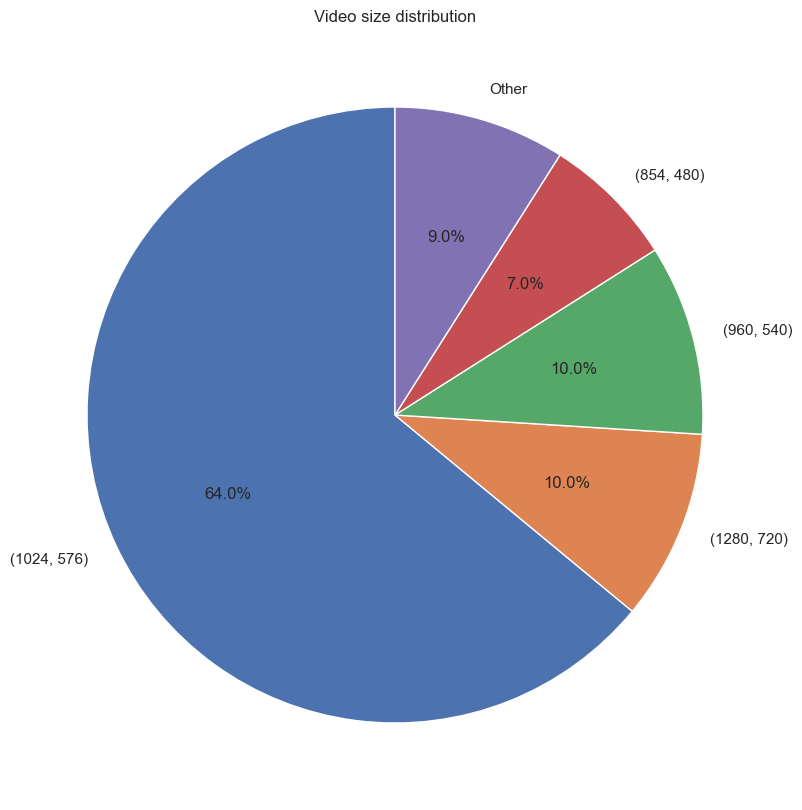

In [39]:
plt.figure(figsize=(10, 10))
plt.pie(pie_df['Number of videos'], labels=pie_df['Video Size'], startangle=90, autopct='%1.1f%%')
plt.title('Video size distribution')
plt.show()

As you can see from the pie chart, video size 1024x576 is the most popular among top 100 videos based on views with the percentage of 64%. The second popular size in top 100 videos based on views is 1280x720 and the third place is 960x540 with 10% each.

## **Overall Insights**

- Despite being one of the years with the most videos in four years, 2020 saw extremely low video views on TikTok. One possible explanation for this is that 2020 was Lazada’s first year of building content on TikTok. Lazada may not have known how to reach their target audiences on TikTok, or they may not have invested enough in content creation.

- With more videos being made in the latter half of the year (June - December), it could be due to the increase in special occasions during this period (Vietnam women’s Day, Christmas, New year,...).

- Lazada’s viewers segment mainly use TikTok at 10:00 PM as this hour reaches the highest view.

- The overall engagement with Lazada’s content is relatively low, with most videos receiving only a small number of comments. However, the videos are relatively popular, with a significant number being liked and saved by users. This indicates that the videos are considered to be valuable and worth keeping for future reference or enjoyment. Moreover, the videos are not widely disseminated or considered particularly shareable, and they are relatively short, with a significant number being under a minute long. This indicates that the videos are likely to be consumable in a short amount of time, which may be appealing to viewers who have limited attention spans or prefer quick and concise content.


# **STATISTICAL CALCULATION**

## **Variance and standard deviation**

In [40]:
# Define function to find standard deviation of variables
def deviation(arr, mean):
    arr = sorted(arr)
    num = 0
    for i in arr:
        num += (i - mean) ** 2

    return math.sqrt(num / len(arr))

# Define function to find variance of variables
def variance(arr, mean):
    arr = sorted(arr)
    num = 0
    for i in arr:
        num += (i - mean)  ** 2

    return num / (len(arr) - 1)

In [41]:
# Variance and standard deviation of Likes
print("Variance of Likes:", variance(Likes, meanLikes))
print("Variance of Likes calculated by built-in function:",statistics.variance(Likes))
print("Standard deviation of Likes:", deviation(Likes, meanLikes))
print("Standard deviation of Likes calculated by built-in function:", np.std(Likes))

Variance of Likes: 1500655277.9627974
Variance of Likes calculated by built-in function: 1500655277.9627972
Standard deviation of Likes: 38727.583559193234
Standard deviation of Likes calculated by built-in function: 38727.58355919325


* The variance of Likes is 1500655277.9627948, which is a very high number. This suggests that there is a large range in the number of likes received by different items, with some items receiving very few likes and others receiving a large number of likes.
* The standard deviation of Likes is 38727.5835591932. This is a large number, which is consistent with the high variance of likes. It suggests that the likes are spread out over a wide range, with some items receiving far fewer or more likes than the average.

In summary, the variance and standard deviation of Likes indicate that there is a large degree of variation in the number of likes received by different content items. This suggests that the content is not equally appealing to all viewers, with some items resonating with a large audience while others receive minimal engagement.

In [42]:
# Variance and standard deviation of Comments
print("Variance of Comments:", variance(Comments, meanComments))
print("Variance of Comments calculated by built-in function:",statistics.variance(Comments))
print("Standard deviation of Comments:", deviation(Comments, meanComments))
print("Standard deviation of Comments calculated by built-in function:", np.std(Comments))

Variance of Comments: 209940.31835842904
Variance of Comments calculated by built-in function: 209940.3183584291
Standard deviation of Comments: 458.06578688486417
Standard deviation of Comments calculated by built-in function: 458.06578688486013


* The variance of Comments is 209940.3183584315, which is a moderately high number. This suggests that there is a fair amount of variation in the number of comments received by different items, with some items receiving very few comments and others receiving a large number of comments.
* The standard deviation of Comments is 458.0657868848669. This is a moderate number, which is consistent with the moderately high variance of comments. It suggests that the comments are spread out over a moderate range, with some items receiving far fewer or more comments than the average.

In summary, the variance and standard deviation of Comments indicate that there is a moderate degree of variation in the number of comments received by different content items. This suggests that the content is not equally engaging to all viewers, but there is a fair amount of discussion and interaction prompted by some items.

In [43]:
# Variance and standard deviation of Saves
print("Variance of Saves:", variance(Saves, meanSaves))
print("Variance of Saves calculated by built-in function:",statistics.variance(Saves))
print("Standard deviation of Saves:", deviation(Saves,meanSaves))
print("Standard deviation of Saves calculated by built-in function:", np.std(Saves))

Variance of Saves: 21017.85968265849
Variance of Saves calculated by built-in function: 21017.859682658487
Standard deviation of Saves: 144.9353000011628
Standard deviation of Saves calculated by built-in function: 144.9353000011631


* The variance of Saves is 21017.859682659197, which is a moderately high number. This suggests that there is a fair amount of variation in the number of saves received by different items, with some items being saved very few times and others being saved a large number of times.
* The standard deviation of Saves is 144.93530000116525. This is a moderate number, which is consistent with the moderately high variance of saves. It suggests that the saves are spread out over a moderate range, with some items being saved far fewer or more times than the average.

In summary, the variance and standard deviation of Saves indicate that there is a moderate degree of variation in the number of saves received by different content items. This suggests that the content is not equally valuable to all viewers, but some items are considered worth keeping for future reference or enjoyment to a greater extent than others.

In [44]:
# Variance and standard deviation of Views
print("Variance of Views:", variance(Views, meanViews))
print("Variance of Views calculated by built-in function:",statistics.variance(Views))
print("Standard deviation of Views:", deviation(Views,meanViews))
print("Standard deviation of Views calculated by built-in function:", np.std(Views))

Variance of Views: 771851091809.1136
Variance of Views calculated by built-in function: 771851091809.1124
Standard deviation of Views: 878307.7017828024
Standard deviation of Views calculated by built-in function: 878307.7017828012


* The variance of Views is 771851091809.1123, which is an extremely high number. This suggests that there is a very large range in the number of views received by different items, with some items receiving very few views and others receiving a massive number of views.
* The standard deviation of Views is 878307.7017828015. This is a very high number, which is consistent with the extremely high variance of views. It suggests that the views are spread out over a very wide range, with some items receiving far fewer or more views than the average.

In summary, the variance and standard deviation of Views indicate that there is an extremely high degree of variation in the number of views received by different content items. This suggests that the content is not equally appealing to all viewers, with some items resonating with a massive audience while others receive minimal viewership.

In [45]:
# Variance and standard deviation of Shares
print("Variance of Shares:", variance(Shares, meanShares))
print("Variance of Shares calculated by built-in function:",statistics.variance(Shares))
print("Standard deviation of Shares:", deviation(Shares,meanShares))
print("Standard deviation of Shares by built-in function:", np.std(Shares))

Variance of Shares: 12956.221617453533
Variance of Shares calculated by built-in function: 12956.221617453539
Standard deviation of Shares: 113.79393449128641
Standard deviation of Shares by built-in function: 113.79393449128534


* The variance of Shares is 12956.221617453539, which is a moderate number. This suggests that there is a fair amount of variation in the number of shares received by different items, with some items being shared very few times and others being shared a large number of times.
* The standard deviation of Shares is 113.79393449128642. This is a moderate number, which is consistent with the moderate variance of shares. It suggests that the shares are spread out over a moderate range, with some items being shared far fewer or more times than the average.

In summary, the variance and standard deviation of Shares indicate that there is a moderate degree of variation in the number of shares received by different content items. This suggests that the content is not equally shareable to all viewers, but some items are considered more shareable and reach a wider audience than others.

In [46]:
# Variance and standard deviation of Duration
print("Variance of Duration:", variance(Duration, meanDuration))
print("Variance of Duration calculated by built-in function:",statistics.variance(Duration))
print("Standard deviation of Duration:", deviation(Duration, meanDuration))
print("Standard deviation of Duration by built-in function:", np.std(Duration))

Variance of Duration: 429.7268108816773
Variance of Duration calculated by built-in function: 429.72681088167815
Standard deviation of Duration: 20.724122695819293
Standard deviation of Duration by built-in function: 20.724122695819233


* The variance of Shares is 12956.221617453539, which is a moderate number. This suggests that there is a fair amount of variation in the number of shares received by different items, with some items being shared very few times and others being shared a large number of times.
* The standard deviation of Shares is 113.79393449128642. This is a moderate number, which is consistent with the moderate variance of shares. It suggests that the shares are spread out over a moderate range, with some items being shared far fewer or more times than the average.

In summary, the variance and standard deviation of Shares indicate that there is a moderate degree of variation in the number of shares received by different content items. This suggests that the content is not equally shareable to all viewers, but some items are considered more shareable and reach a wider audience than others.

## **Correlation and covariance**

In [47]:
# Define function to find correlation and covariance
def find_correlation(data, columnA, columnB, mean_A, mean_B):
    covariance = np.sum((finaldata[columnA] - mean_A) * (finaldata[columnB] - mean_B)) / len(finaldata)
    correlation = covariance / (deviation(finaldata[columnA],mean_A) * deviation(finaldata[columnB],mean_B))
    return round(correlation, 2), round(covariance, 2)

In [48]:
# Correlation and covariance
correlation_views_likes, covariance_views_likes = find_correlation(finaldata,"Views" , "Likes", meanViews, meanLikes)
correlation_views_comments, covariance_views_comments = find_correlation(finaldata,"Views" , "Comments", meanViews, meanComments)
correlation_views_shares, covariance_views_shares = find_correlation(finaldata,"Views" , "Shares", meanViews, meanShares)
correlation_views_saves, covariance_views_saves = find_correlation(finaldata,"Views" , "Saves", meanViews, meanSaves)
correlation_views_duration, covariance_views_duration = find_correlation(finaldata,"Views" , "Duration(sec)", meanViews, meanDuration)

print("Covariance betwwen Views and Likes:",covariance_views_likes)
print("Covariance betwwen Views and Comments:",covariance_views_comments)
print("Covariance betwwen Views and Shares:",covariance_views_shares)
print("Covariance betwwen Views and Saves:",covariance_views_saves)
print("Covariance betwwen Views and Duration:",covariance_views_duration)
print()

print("Correlation betwwen Views and Likes:",correlation_views_likes)
print("Correlation betwwen Views and Comments:",correlation_views_comments)
print("Correlation betwwen Views and Shares:",correlation_views_shares)
print("Correlation betwwen Views and Saves:",correlation_views_saves)
print("Correlation betwwen Views and Duration:",correlation_views_duration)

Covariance betwwen Views and Likes: 27191453255.73
Covariance betwwen Views and Comments: 91537566.27
Covariance betwwen Views and Shares: 65439148.08
Covariance betwwen Views and Saves: 79734729.6
Covariance betwwen Views and Duration: 4515031.86

Correlation betwwen Views and Likes: 0.8
Correlation betwwen Views and Comments: 0.23
Correlation betwwen Views and Shares: 0.65
Correlation betwwen Views and Saves: 0.63
Correlation betwwen Views and Duration: 0.25


Text(0.5, 1.0, 'Correlation between Views and Engagement Metrics')

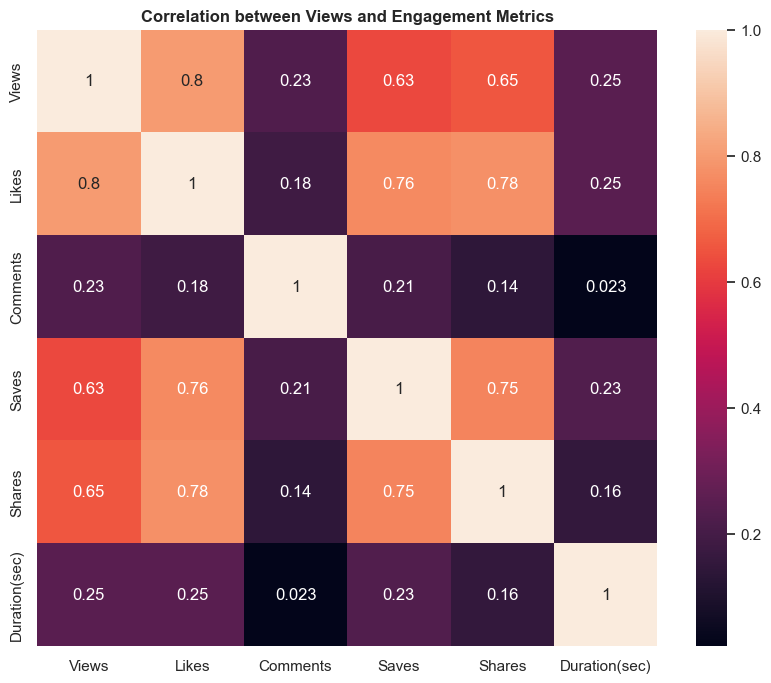

In [49]:
# Visualize the correlation by heatmap
fig = plt.figure(figsize=(10, 8))
corr = finaldata[['Views', 'Likes', 'Comments', 'Saves', 'Shares', 'Duration(sec)']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation between Views and Engagement Metrics',fontweight='bold')

**Interpretation**

- A strong positive correlation (0.8) exists between likes and views. As the number of views increases, the number of comments tends to increase, but the relationship is not very strong.

- A relatively weak positive correlation (0.23) exists between comments and views, suggesting that videos that spark discussions and encourage engagement tend to slightly attract more views.

- A moderate positive correlation (0.65) exists between shares and views, indicating that videos with high shareability are more likely to reach a wider audience and garner higher viewership. Shares act as a form of word-of-mouth marketing, spreading the video's reach beyond the initial audience and attracting new viewers.

- A moderate positive correlation (0.63) exists between saves and views, suggesting that videos perceived as valuable and worth revisiting tend to attract more views. Saved videos are more likely to be revisited and rewatched, contributing to sustained viewership over time.

- A weak positive correlation (0.25) exists between duration and views, indicating that while longer videos may offer more in-depth content, their ability to attract viewers depends on their ability to maintain engagement throughout.

Overall, content creators should focus on creating high-quality, engaging content that encourages viewers to like, share, and save their videos. They should also pay attention to viewer feedback and use it to refine their content.


# **LINEAR REGRESSION**

In [50]:
X = finaldata[features]
y = finaldata[target[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [51]:
# Initialize Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Views prediction of X train
predictions = model.predict(X_train)
predictions = [int(prediction) for prediction in predictions]

In [53]:
# Define function to find R_squared
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = sum((y_true - mean_y_true)**2)
    ss_residual = sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [54]:
r2 = round(r_squared(y_train, predictions), 5)
ln_r2_train = r2

In [55]:
# Views prediction of X test
predictions = model.predict(X_test)
predictions = [int(prediction) for prediction in predictions]

[304246, 477969, -10854, 2088803, 140087, 63267, 188060, 336028, 49535, 57602, 80411, 77328, 271848, 558888, 423475, 788334, 406106, 1623430, 308651, 45718, 440677, 47988, 170658, -30170, 196132, 225731, 110416, 155306, 1758534, 74304, -5154, 409713, 2723404, 378960, 61004, 567349, 81494, -8219, 3555313, 88960, 77448, 195408, 408887, 765631, 13034, 814758, 351130, 414122, 167734, 65859, 266075, 58186, 3727028, 93534, 143776, 88160, 601353, 1547952, 556603, 419658, 665785, 1859432, 1118061, 294487, 266930, 50234, 643582, 146740, 14301, 434204, 406452, 683953, 144844, 428703, 412620, 431063, 84024, 85986, 73933, 312707, 197005, 497498, 112327, 67982, 240370, 218876, 952475, 456786, 62020, 111921, -15459, 26508, 938792, 174798, 69981, 1697588, 597547, 3906553, 101590, 249205, 81761, 420233, 388943, 479538, -14812, -7855, 39527, 54509, 370224, 113675, 1289559, 192962, 310363, 176946, 3794318, 394992, 299334, 131170, 616924, 236075, 478652, 73239, 13927, 356409, 632712, 443227, 88829, 37803

In [56]:
r2 = round(r_squared(y_test, predictions), 5)
ln_r2_test = r2

In [57]:
# Create a DataFrame with the data
ln_data = {
    'Dataset': ['Train', 'Test'],
    'R-squared': [ln_r2_train, ln_r2_test]
}

ln_r2_df = pd.DataFrame(ln_data)

print("R_squared in linear regression model:",'\n',ln_r2_df.to_string(index=False))

R_squared in linear regression model: 
 Dataset  R-squared
  Train    0.67952
   Test    0.62587


In [58]:
# Create DataFrame contains Actual Views and Predicted Views
results_df = pd.DataFrame({'Actual Views': y_test, 'Predicted Views': predictions})

# Concatenate result with X_test value
results_df = pd.concat([X_test, results_df], axis = 1)

results_df

,Create_year,Create_month,Create_day,Create_hour,Video Height,Video Width,Likes,Comments,Saves,Shares,Duration(sec),Actual Views,Predicted Views
1214,2021,6,6,0,1024,576,484,2,3,6,83,17300,304246
65,2023,4,1,15,1024,576,1799,18,36,19,29,79500,477969
1502,2020,12,12,17,544,960,353,0,6,8,30,21100,-10854
758,2022,1,28,10,1024,576,105700,235,774,227,59,2500000,2088803
1369,2021,3,23,17,854,480,545,0,11,7,17,16200,140087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2023,10,27,11,1024,576,14300,85,92,336,14,2100000,961305
1511,2020,12,10,19,960,540,19800,168,138,129,7,159900,511634
982,2021,10,11,11,1024,576,100400,72,296,87,27,1400000,1900284
144,2023,1,18,14,1024,576,553,6,6,1,26,36000,406407


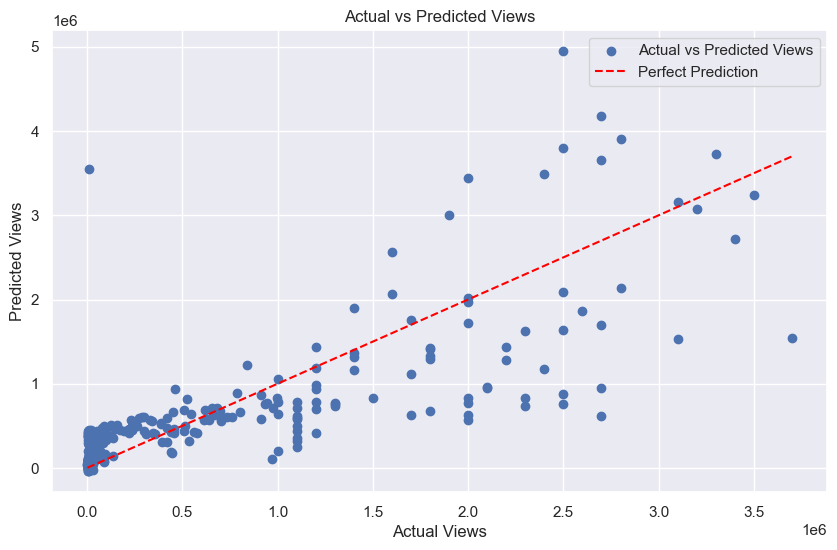

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Views'], results_df['Predicted Views'], label='Actual vs Predicted Views')
plt.plot([results_df['Actual Views'].min(), results_df['Actual Views'].max()], [results_df['Actual Views'].min(), results_df['Actual Views'].max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Views')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.legend()
plt.grid(True)
plt.show()

- The R_squared of train set and test set in linear regression model are 0,67 and 0,629 respectively which means that approximately 67.6% and 62,9% of the variance in the target variable (dependent variable) based on the training and testing data.

- The R-squared values for both the train and test sets are relatively lower than that of random forest regression model, suggesting that the model may not be a good fit for the data and has the potential to make inaccurate predictions on new data.

- Besides, when using linear regression for prediction purposes, the predictions can exceed the range of the training samples. To be specific, in this case, there is a negative value when it comes to making predictions of the views, which is inaccurate.


# **RANDOM FOREST**

In [60]:
# Initialize Random Forest
model = RandomForestRegressor(random_state = 30,bootstrap=True,min_samples_split=5,max_features='sqrt')

# Training model Random Forest
model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=5, random_state=30)

In [61]:
# Extract feature importances
importances = model.feature_importances_

# Create Dataframe to present the importance of features.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort Dataframe by feature importance in decrease order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,Likes,0.386131
9,Shares,0.229415
8,Saves,0.153836
7,Comments,0.105673
10,Duration(sec),0.028650
0,Create_year,0.022835
1,Create_month,0.020334
2,Create_day,0.017840
3,Create_hour,0.015483
4,Video Height,0.012835


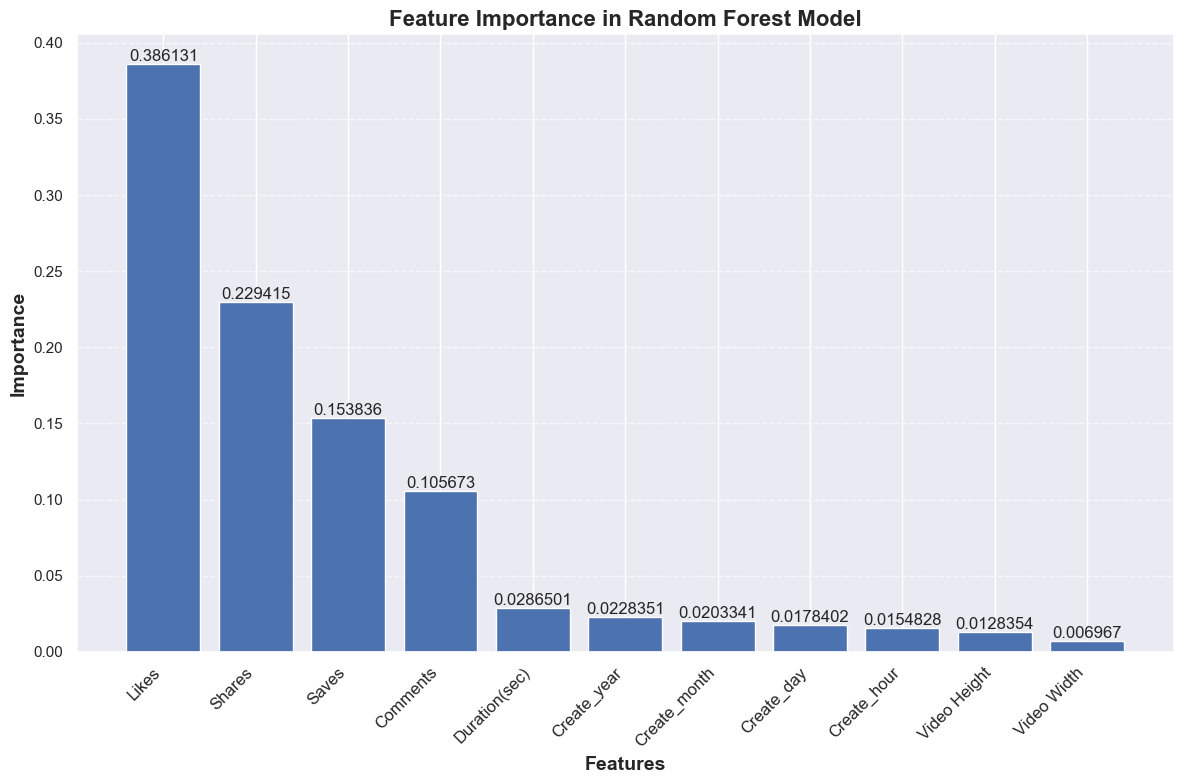

In [62]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot with gradient color mapping
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])

# Customize bar appearance
plt.bar_label(bars)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
plt.title('Feature Importance in Random Forest Model', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The result of the Random Forest model illustrated in the bar chart above shows that the variable "Likes" has the highest impact on views with 0.380047. It implies that videos with more likes may engage the audience more, leading to increasing views. Following is the variable "Saves" in the second place with 0.226596 and "Comments" in the third place with 0.209704 of importance in affecting views. The rest variables still have a slight correlation with views of video; however, it is much less important compared to likes, saves, and comments due to the huge gap in the statistics of importance resulting from the Random Forest model above.

## **View Prediction**

In [63]:
# Views prediction of X train
predictions = model.predict(X_train)
predictions = [int(prediction) for prediction in predictions]

In [64]:
# Evaluate with self initialization by comparing actual and predicted value
r2 = round(r_squared(y_train, predictions), 5)
rf_r2_train = r2

In [65]:
# Views prediction of X test
predictions = model.predict(X_test)
predictions = [int(prediction) for prediction in predictions]

In [66]:
# Evaluate with self initialization by comparing actual and predicted value
r2 = round(r_squared(y_test, predictions), 5)
rf_r2_test = r2

In [67]:
# Create a DataFrame with the data
rf_data = {
    'Dataset': ['Train', 'Test'],
    'R-squared': [rf_r2_train, rf_r2_test]
}

rf_r2_df = pd.DataFrame(rf_data)

print("R_squared in random forest regression model:",'\n',rf_r2_df.to_string(index=False))

R_squared in random forest regression model: 
 Dataset  R-squared
  Train    0.95842
   Test    0.85638


In [68]:
# Create DataFrame contains Actual Views and Predicted Views
results_df = pd.DataFrame({'Actual Views': y_test, 'Predicted Views': predictions})

# Concatenate result with X_test value
results_df = pd.concat([X_test, results_df], axis = 1)

results_df

,Create_year,Create_month,Create_day,Create_hour,Video Height,Video Width,Likes,Comments,Saves,Shares,Duration(sec),Actual Views,Predicted Views
1214,2021,6,6,0,1024,576,484,2,3,6,83,17300,20457
65,2023,4,1,15,1024,576,1799,18,36,19,29,79500,223364
1502,2020,12,12,17,544,960,353,0,6,8,30,21100,21652
758,2022,1,28,10,1024,576,105700,235,774,227,59,2500000,2604596
1369,2021,3,23,17,854,480,545,0,11,7,17,16200,26442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2023,10,27,11,1024,576,14300,85,92,336,14,2100000,1518795
1511,2020,12,10,19,960,540,19800,168,138,129,7,159900,1390511
982,2021,10,11,11,1024,576,100400,72,296,87,27,1400000,1694424
144,2023,1,18,14,1024,576,553,6,6,1,26,36000,29027


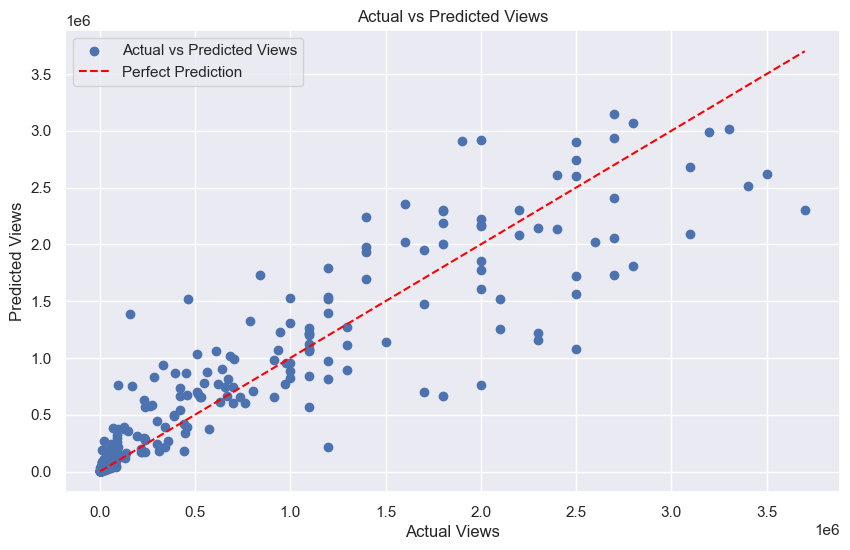

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Views'], results_df['Predicted Views'], label='Actual vs Predicted Views')
plt.plot([results_df['Actual Views'].min(), results_df['Actual Views'].max()], [results_df['Actual Views'].min(), results_df['Actual Views'].max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Views')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.legend()
plt.grid(True)
plt.show()

## **Random Forest Result and Evaluation**

- Random forest regression stands out as a preferred choice over linear regression due to some key advantages. Firstly, random forest can capture nonlinear relationships between the independent variables and the target variable, whereas linear regression assumes a linear relationship. This makes random forest more versatile and adaptable to a wider range of data. Secondly, random forest is less prone to overfitting than linear regression. Overfitting occurs when a model becomes too closely aligned with the training data and fails to generalize well to new data. Random forest’s ensemble nature helps to reduce overfitting by averaging the predictions of multiple decision trees. Thirdly, random forest provides an estimate of the relative importance of each feature in predicting the target variable. This information can be valuable for feature selection and understanding the underlying relationships in the data. Moreover, random forest regression is more robust to outliers than linear regression. Outliers are data points that deviate significantly from the rest of the data and can negatively impact the performance of linear regression models. Thus, random forest’s ensemble nature helps to mitigate the effects of outliers. And finally, random forest can handle missing values in the data, whereas linear regression requires imputation or data cleaning. This can be particularly useful when dealing with real-world data, which often contains missing values.

- Another reason of choosing random forest is that the result of R-squared of dataset generated from this model is higher than that generated from linear regression model. Specifically, in random forest regression, R-squared of test dataset is 0.85266 and R-squared of train dataset is 0.95479; whereas in linear regression model, R-squared of test set is 0.628806605727617 and R-squared of train set is 0.6759582679878464 (0.85266 > 0.628806605727617; 0.95479 > 0.6759582679878464). In this case, a higher R-squared value for a model indicates that it better explains the relationship between the independent variables and the target variable.

To sum up, these advantages make random forest regression more versatile and robust in a wider range of data scenarios and finally become a better choice for the dataset compared to the linear regression model.

## **Random Forest Algorithm Explanation**

This algorithm is used to predict the number of views a video will receive using a random forest model.

- Firstly, we split the data into a training and
testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance on unseen data. There are some common ratios for test size, after we have run the model with different ratio test size, we chose the test size of 20% as it gives the best prediction.

- The random_state parameter ensures that the split is reproducible. The nature of splitting data into training data and testing sets is random, so you will get different data assigned to the training and testing sets unless you can control the randomness. The random_state parameter controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same hyperparameters and training data.

- Besides, we also used bootstrap in the model. This means that multiple training sets are created by sampling with replacement from the original training data. And some data points may appear multiple times in a single sample, while others may not appear at all. Each bootstrap sample is then used to train a separate Random Forest tree, resulting in an ensemble of trees. This helps to reduce the impact of random sampling on the model's performance and provides a more robust assessment of its generalizability.

- In addition, we set min_samples_split=5 instead of the default value of 1. This parameter sets the minimum number of samples required to split an internal node in a tree. A higher value prevents the creation of shallow trees with few data points, which can reduce overfitting.

- In terms of max_features, we set max_features='sqrt'. The reason to use this hyperparameter is, if we allow all the features for each split, we may end up with exactly the same trees in the entire random forest which might not be useful. By setting it as ‘sqrt’, the algorithm randomly selects a subset of features, approximately the square root of the total number of features, to consider at each split. Since we have 10 features, the algorithm would randomly select a subset of 3 features to consider.This approach helps to prevent the model from relying too heavily on a small number of features, which can lead to overfitting.

- And we use R_squared to evaluate the performance of the model. R-squared is a popular metric for evaluating the overall fit of a regression model. It measures the proportion of variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit of the model to the data.




# **CONCLUSION AND RECOMMENDATIONS**

Although the Random Forest model is better in prediction compared to Linear Regression model as demonstrated above, it still has some disadvantages that we should take into consideration when running this model.

- As we all know the more shares a video has, the more views a video tends to get. However, the result of Random Forest model predicted that "shares" variable has nearly no impact on view. This is a controversy that maybe a limitation of this model.

- Moreover, Random Forest models can make predictions that are difficult to explain, make it challenging to justify decisions based on the model's outputs. This lack of interpretability can hinder trust and adoption of the model in certain applications, especially when stakeholders need to understand the rationale behind the predictions.

- Also, Random Forest is a complex model, and its inner workings can be difficult to interpret. This can make it challenging to understand the underlying relationships in the data. Unlike linear regression, where the coefficients provide direct insights into the relationships between variables, random forest regression's predictions are based on the collective decisions of multiple decision trees, making it less straightforward to interpret.

Therefore, we have some recommendations and insights for Lazada Vietnam to improve their video's engagement on Tiktok platform after considering all of the findings above.

- First, comments provide valuable insights into viewer reactions and preferences, allowing content creators to refine their content and cater to their audience's interests. This feedback loop fosters a sense of community and encourages continued engagement. Therefore, videos can spark the discussion leading to increased viewership.

- Secondly, content that resonates with viewers and sparks conversations is more likely to be shared, amplifying its impact and driving viewership.

- Last but not least, content that provides lasting value and relevance to viewers is more likely to be saved and revisited, driving long-term viewership.